## Pré-processamento

In [1]:
#importando bibliotecas
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import numpy as np
import seaborn as sns

In [104]:
df = pd.read_csv("abalone.data", header=None)

df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [105]:
df.shape

(4177, 9)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [107]:
df.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [108]:
df[0].unique()

array(['M', 'F', 'I'], dtype=object)

In [109]:
df[0].value_counts()

M    1528
I    1342
F    1307
Name: 0, dtype: int64

In [110]:
df = df.loc[:, df.columns != 0].astype(float)

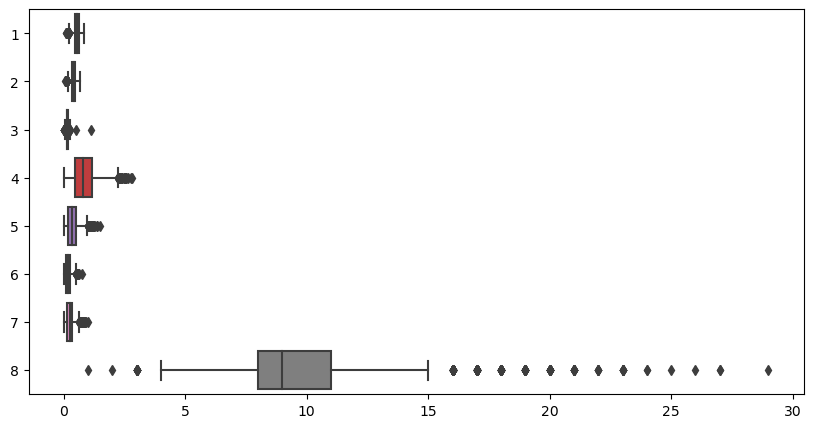

In [111]:
plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.boxplot(data=df.loc[:, df.columns != 0], orient="h")

In [112]:
boxplot_stats(df)

[{'mean': 0.5239920995930094,
  'iqr': 0.16499999999999998,
  'cilo': 0.5409917817695626,
  'cihi': 0.5490082182304374,
  'whishi': 0.815,
  'whislo': 0.205,
  'fliers': array([0.175, 0.17 , 0.075, 0.13 , 0.11 , 0.16 , 0.2  , 0.165, 0.19 ,
         0.175, 0.2  , 0.175, 0.155, 0.195, 0.165, 0.155, 0.18 , 0.15 ,
         0.16 , 0.185, 0.195, 0.195, 0.2  , 0.185, 0.14 , 0.185, 0.135,
         0.16 , 0.13 , 0.18 , 0.165, 0.19 , 0.17 , 0.18 , 0.175, 0.155,
         0.2  , 0.19 , 0.18 , 0.2  , 0.2  , 0.165, 0.19 , 0.165, 0.175,
         0.17 , 0.14 , 0.16 , 0.185]),
  'q1': 0.45,
  'med': 0.545,
  'q3': 0.615},
 {'mean': 0.40788125448886764,
  'iqr': 0.13,
  'cilo': 0.4218420098790493,
  'cihi': 0.4281579901209507,
  'whishi': 0.65,
  'whislo': 0.155,
  'fliers': array([0.15 , 0.15 , 0.13 , 0.13 , 0.055, 0.1  , 0.09 , 0.12 , 0.145,
         0.12 , 0.145, 0.125, 0.15 , 0.14 , 0.125, 0.11 , 0.145, 0.11 ,
         0.105, 0.125, 0.1  , 0.11 , 0.14 , 0.12 , 0.13 , 0.15 , 0.135,
         0.105, 0.

In [113]:
outliers = boxplot_stats(df[8]).pop(0)["fliers"]

outliers

array([ 1.,  3.,  3.,  3.,  3.,  3.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3., 20., 16., 19., 18., 19., 16., 20., 16., 21.,
       19., 18., 17., 16., 16., 18., 16., 20., 20., 21., 16., 22., 17.,
       19., 22., 16., 22., 18., 20., 17., 17., 19., 26., 21., 19., 23.,
       23., 18., 16., 16., 22., 16., 20., 18., 17., 16., 18., 20., 16.,
       19., 17., 16., 16., 19., 20., 16., 20., 20., 16., 18., 19., 21.,
       18., 18., 20., 18., 22., 19., 16., 18., 16., 16., 17., 17., 21.,
       17., 17., 21., 16., 29., 17., 19., 17., 19., 23., 17., 16., 20.,
       17., 16., 20., 17., 17., 19., 18., 19., 16., 17., 18., 18., 17.,
       21., 19., 17., 16., 18., 18., 19., 17., 19., 21., 23., 22., 23.,
       16., 16., 16., 17., 18., 17., 20., 17., 17., 20., 20., 16., 17.,
       17., 21., 17., 17., 16., 17., 19., 27., 16., 18., 16., 17., 19.,
       17., 20., 21., 16., 21., 25., 19., 18., 16., 27., 18., 17., 17.,
       17., 17., 17., 17., 18., 20., 19., 23., 16., 16., 17., 17

In [114]:
#dropando outliers
df.drop(np.where(df[8].isin(outliers))[0], inplace=True)

df

,1,2,3,4,5,6,7,8
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [115]:
df.shape

(3899, 8)

In [116]:
df.describe()

,1,2,3,4,5,6,7,8
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,0.520589,0.404674,0.137685,0.807132,0.355140,0.176934,0.229387,9.409592
std,0.119042,0.098161,0.041225,0.482181,0.223098,0.108866,0.131349,2.384579
min,0.130000,0.095000,0.000000,0.010500,0.005000,0.000500,0.003500,4.000000
25%,0.445000,0.345000,0.110000,0.425000,0.178500,0.089000,0.125000,8.000000
50%,0.535000,0.420000,0.140000,0.770000,0.328500,0.165000,0.221500,9.000000
75%,0.610000,0.480000,0.165000,1.132500,0.498250,0.247000,0.316250,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,0.797500,15.000000


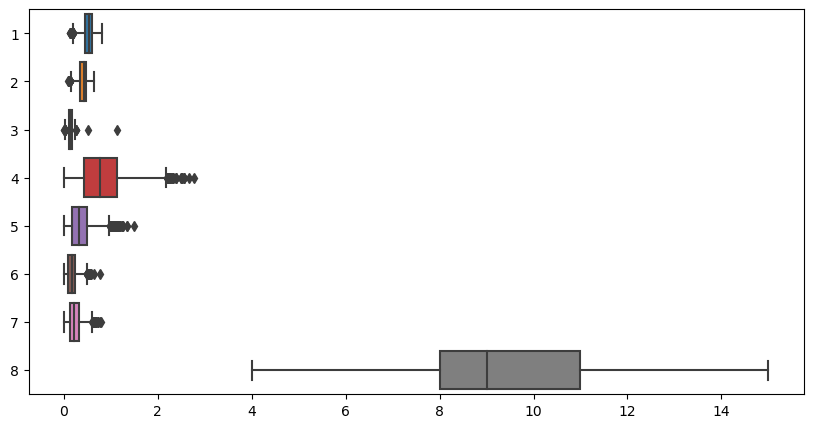

In [117]:
plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.boxplot(data=df.loc[:, df.columns != 0], orient="h")

In [123]:
corr = df.corr()

corr

,1,2,3,4,5,6,7,8
1,1.000000,0.986739,0.821223,0.928793,0.901036,0.905782,0.915441,0.619402
2,0.986739,1.000000,0.826472,0.927675,0.895807,0.901457,0.921645,0.634626
3,0.821223,0.826472,1.000000,0.813744,0.776099,0.795918,0.817244,0.581387
4,0.928793,0.927675,0.813744,1.000000,0.974894,0.968600,0.962201,0.576122
5,0.901036,0.895807,0.776099,0.974894,1.000000,0.934224,0.905270,0.489899
6,0.905782,0.901457,0.795918,0.968600,0.934224,1.000000,0.923698,0.562459
7,0.915441,0.921645,0.817244,0.962201,0.905270,0.923698,1.000000,0.636686
8,0.619402,0.634626,0.581387,0.576122,0.489899,0.562459,0.636686,1.000000


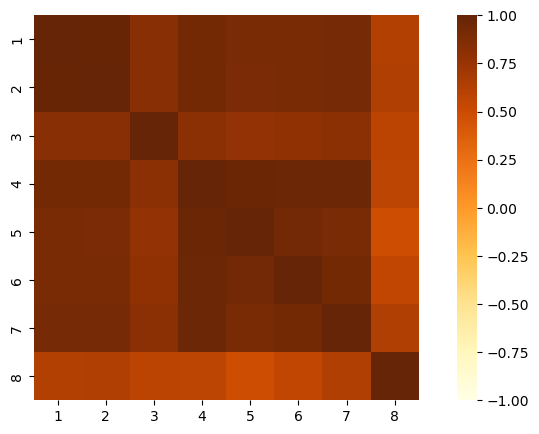

In [122]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="YlOrBr",
    square=True
)

## Aplicando KNN

In [124]:
#importando bibliotecas
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier